In [ ]:
# Predicting Prices of Used Cars (Regression Trees)

#The file ToyotaCorolla.csv contains the data on used cars (Toyota
#Corolla) on sale during late summer of 2004 in the Netherlands. It has 1436 records containing details on 38 attributes, including
#Price, Age, Kilometers, HP, and other specifications. The goal is to predict the price of a used Toyota Corolla based on its
#specifications. Data Preprocessing. Split the data into training (60%), and validation (40%) datasets.
# Run a full-grown regression tree (RT) with outcome variable Price and predictors Age_08_04, KM, Fuel_Type (first
#convert to dummies), HP, Automatic, Doors, Quarterly_Tax, Mfr_Guarantee, Guarantee_Period, Airco, Automatic_airco,
#CD_Player, Powered_Windows, Sport_Model, and Tow_Bar. Set random_state=1.
#i. Which appear to be the three or four most important car specifications for predicting the car’s price?
#ii. Compare the prediction errors of the training and validation sets by examining their RMS error and by
#plotting the two boxplots.
#Create a smaller tree by using GridSearchCV() with cv = 5 to find a fine-tuned tree. Compared to the full-grown
#tree, what is the predictive performance on the validation set?
#b. Let us see the effect of turning the price variable into a categorical variable. First, create a new variable that
#categorizes price into 20 bins. Now repartition the data keeping Binned_Price instead of Price. Run a classification
#tree with the same set of input variables as in the RT, and with Binned_Price as the output variable. As in the less deep
#regression tree, create a smaller tree by using GridSearchCV() with cv = 5 to find a fine-tuned tree.
#i. Compare the smaller tree generated by the CT with the smaller tree generated by RT. Are they different? (Look at structure, the top predictors, size of tree, etc.) Why?
#ii. Predict the price, using the smaller RT and CT, of a used Toyota Corolla with the specifications listed
#iii. Compare the predictions in terms of the predictors that were used, the magnitude of the difference between the
#two predictions, and the advantages and disadvantages of the two methods.


In [30]:
%matplotlib inline
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import collections
import pydotplus
from matplotlib import pyplot
from dmba import plotDecisionTree, classificationSummary, regressionSummary

In [31]:
#PART-A:Using the 15 predictors and 'Price' as the outcome variable. Creating dummies and then splitting the data into
#training (60%) and validation (40%) sets
toyotaCorolla_df = pd.read_csv('ToyotaCorolla.csv')

toyotaCorolla_df = toyotaCorolla_df.rename(columns={'Age_08_04': 'Age', 'Quarterly_Tax': 'Tax'})


predictors = ['Age', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'Doors', 'Tax', 'Mfr_Guarantee', 'Guarantee_Period', 
              'Airco', 'Automatic_airco', 'CD_Player', 'Powered_Windows', 'Sport_Model','Tow_Bar']
outcome = 'Price'

X = pd.get_dummies(toyotaCorolla_df[predictors], drop_first=True)
y = toyotaCorolla_df[outcome]


train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)


In [32]:
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

regressor = DecisionTreeRegressor()
regressor.fit(train_X, train_y)

DecisionTreeRegressor()

In [33]:
#Comparing the errors obtained in the training and validation set
regressionSummary(train_y, regressor.predict(train_X))
regressionSummary(valid_y, regressor.predict(valid_X))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 0.0000
            Mean Absolute Error (MAE) : 0.0000
          Mean Percentage Error (MPE) : 0.0000
Mean Absolute Percentage Error (MAPE) : 0.0000

Regression statistics

                      Mean Error (ME) : 45.6087
       Root Mean Squared Error (RMSE) : 1454.1430
            Mean Absolute Error (MAE) : 1118.0226
          Mean Percentage Error (MPE) : -0.6243
Mean Absolute Percentage Error (MAPE) : 11.0238


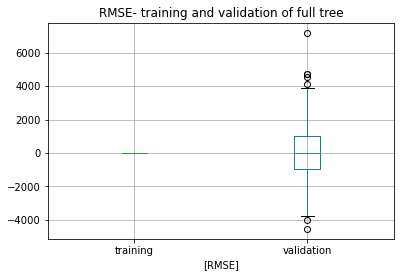

In [34]:
#Using boxplots to plot the training and validation errors
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
pred_error_train = pd.DataFrame({
    'residual': train_y - regressor.predict(train_X), 
    'RMSE': 'training'})

pred_error_valid = pd.DataFrame({
    'residual': valid_y - regressor.predict(valid_X), 
    'RMSE': 'validation'})

boxdata_df = pred_error_train.append(pred_error_valid, ignore_index=True)

boxdata_df.boxplot(by='RMSE')
title_boxplot = 'RMSE- training and validation of full tree'
plt.title(title_boxplot)
plt.suptitle('')
plt.show()

C:\Users\Esha Verma\anaconda3\lib\site-packages\sklearn\tree\_export.py:185: FutureWarning: 'rotate' has no effect and is deprecated in 0.23. It will be removed in 0.25.
  FutureWarning)


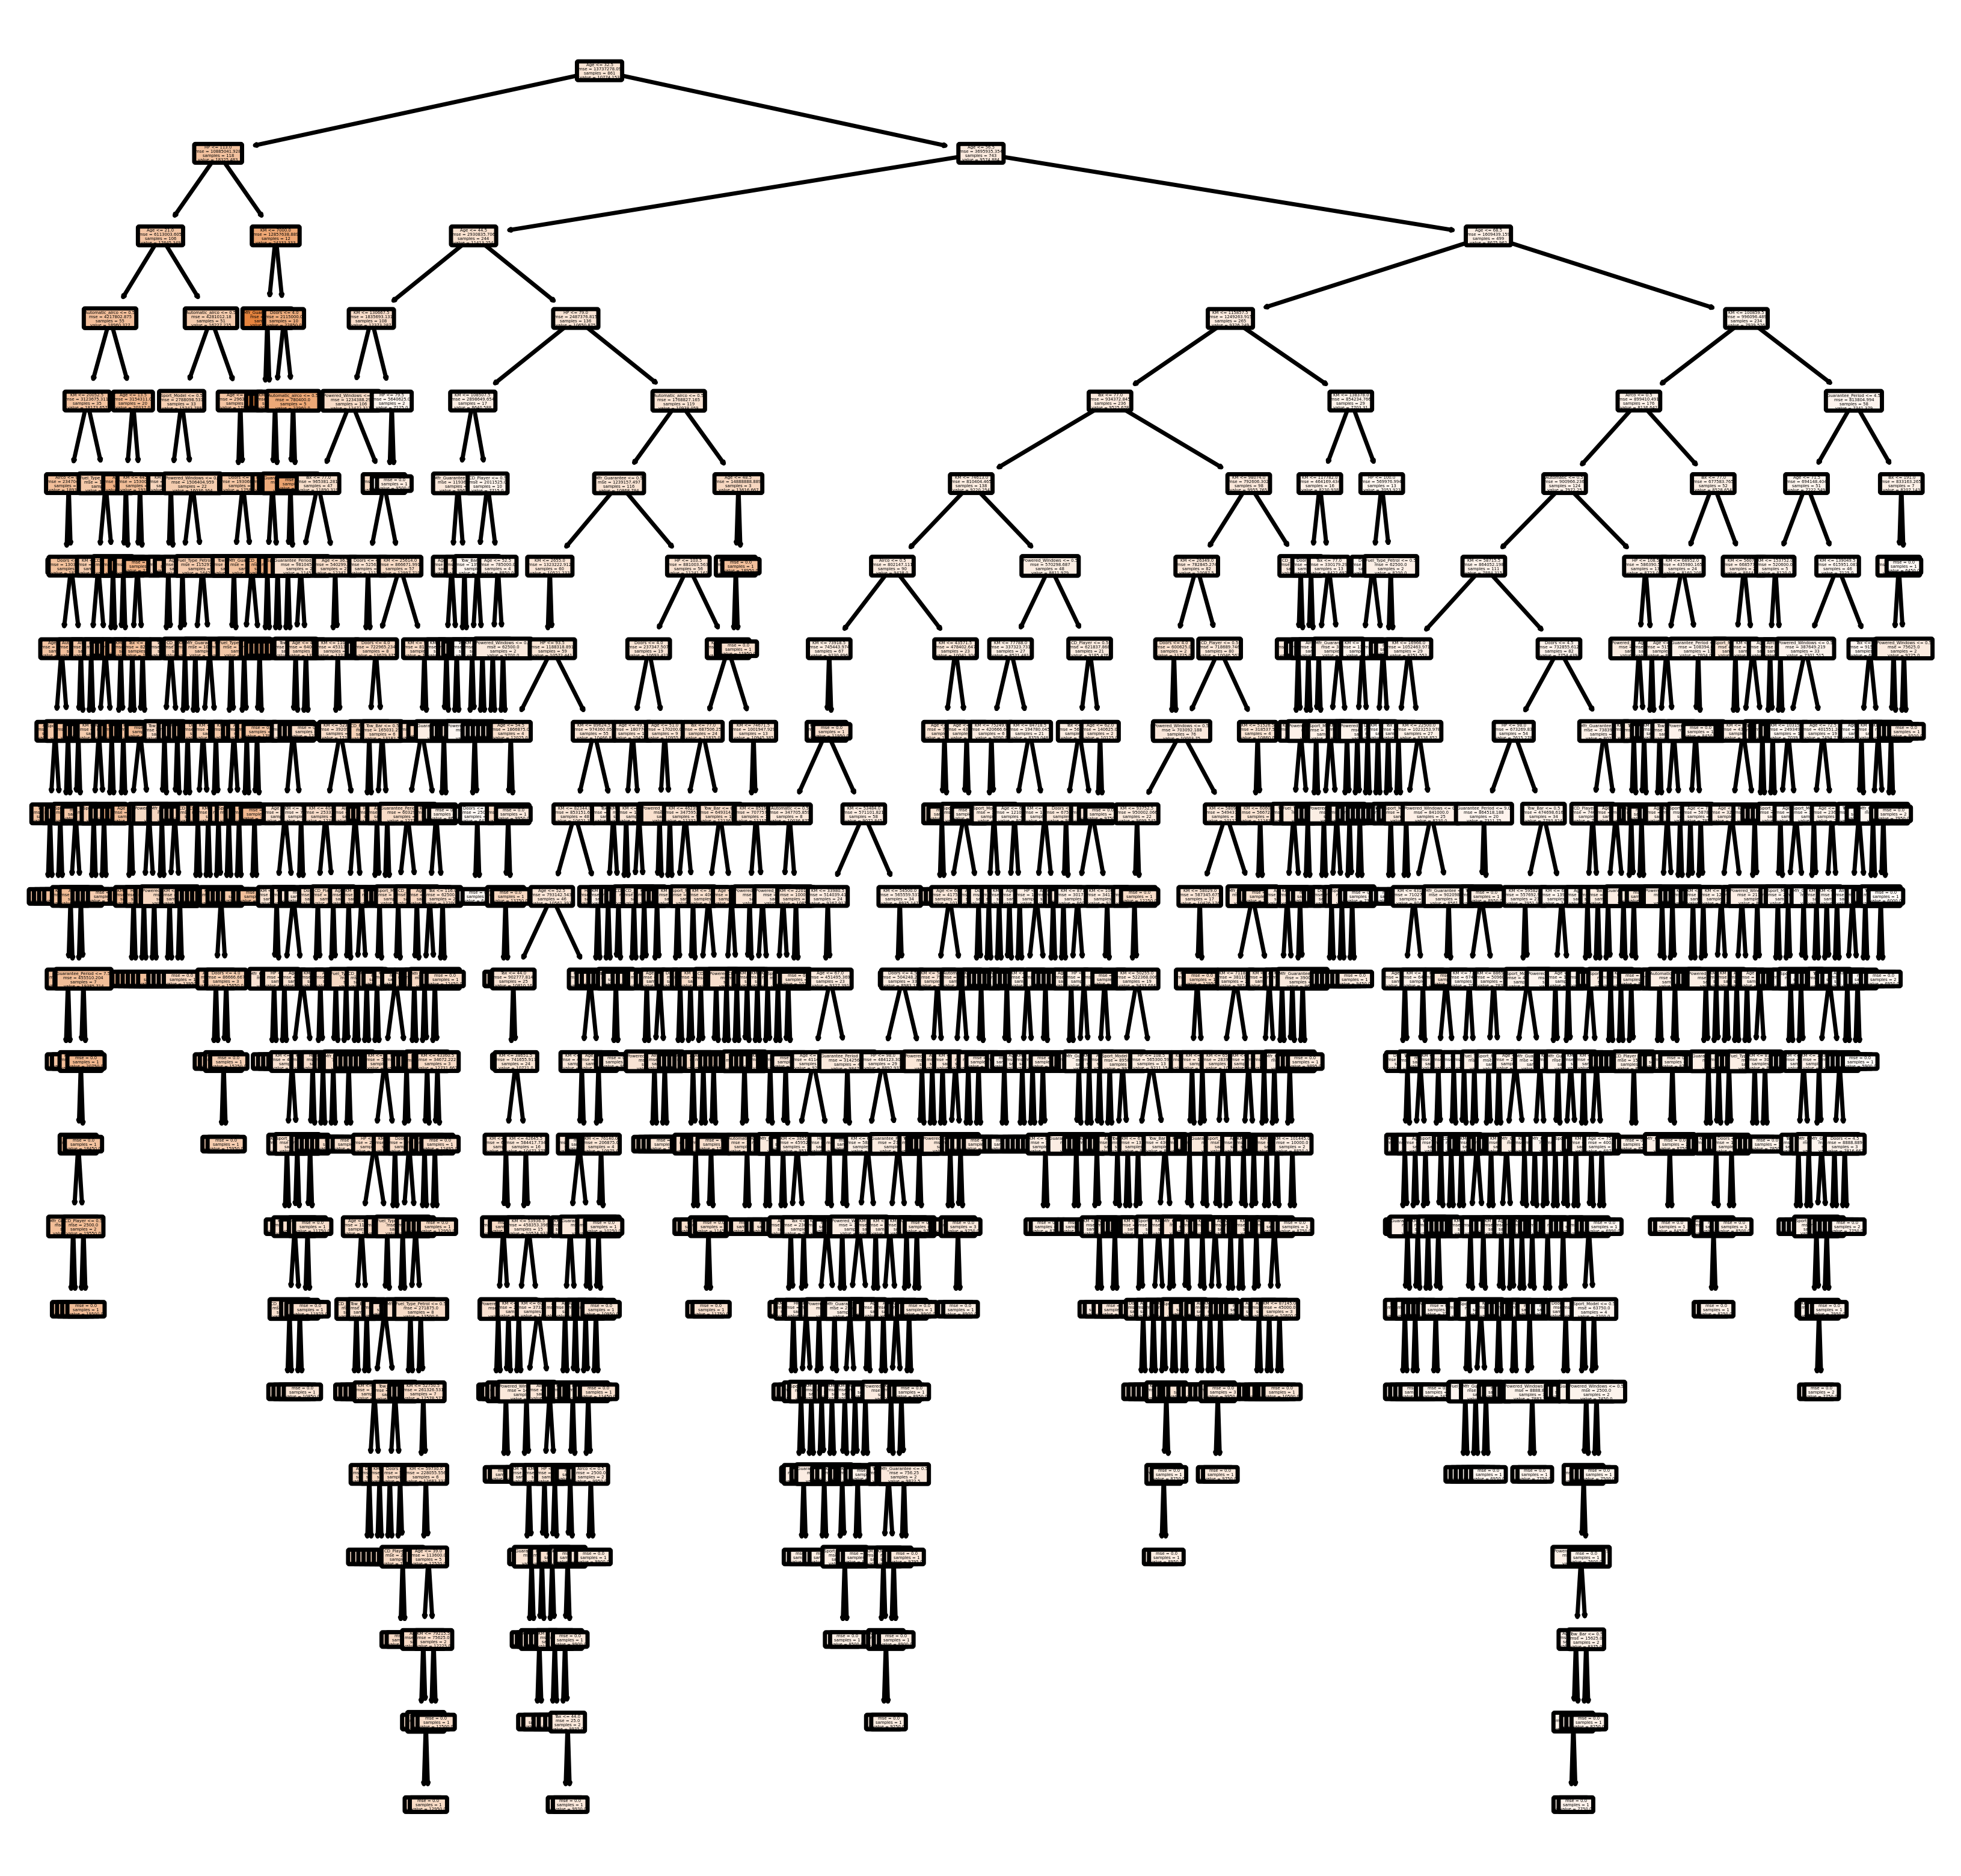

In [35]:
#plotDecisionTree(regTree, feature_names=train_X.columns)
#plotDecisionTree(regTree, feature_names=train_X.columns, rotate=True)
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

# Set dpi (100 - 300) to make image clearer than defaultfig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=300)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,8), dpi=500)

tree.plot_tree(regressor, 
               feature_names=train_X.columns, 
           class_names=True,
           filled = True,rounded=True,rotate=True);
plt.show()

             feature  importance       std
14  Fuel_Type_Diesel    0.008263  0.004099
9    Automatic_airco    0.009114  0.003913
15  Fuel_Type_Petrol    0.009141  0.004312
3          Automatic    0.018761  0.005101
10         CD_Player    0.027931  0.012060
7   Guarantee_Period    0.030728  0.007619
8              Airco    0.033874  0.015557
12       Sport_Model    0.040344  0.010849
11   Powered_Windows    0.041950  0.012705
13           Tow_Bar    0.047072  0.010044
6      Mfr_Guarantee    0.053639  0.014154
5                Tax    0.055361  0.013198
2                 HP    0.057279  0.013021
4              Doors    0.062345  0.011532
0                Age    0.233682  0.020194
1                 KM    0.270517  0.019682


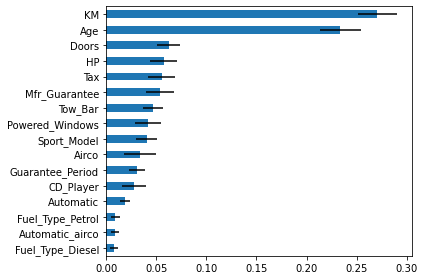

In [36]:
#Using the Random Forest Tree Classifier to find the important variables which seem to be KM, Age, Doors and HP.
rf = RandomForestClassifier(n_estimators=500, random_state=1)
rf.fit(train_X, train_y)
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

df = pd.DataFrame({'feature': train_X.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [37]:
#Using GridSearchCV with cv = 5 to find a fine-tuned tree:
param_grid = {
    'max_depth': [5, 10, 15, 20, 25], 
    'min_impurity_decrease': [0, 0.001, 0.005, 0.01], 
    'min_samples_split': [10, 20, 30, 40, 50], 
}
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Initial parameters: ', gridSearch.best_params_)

param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
    'min_impurity_decrease': [0, 0.001, 0.002, 0.003, 0.005, 0.006, 0.007, 0.008], 
    'min_samples_split': [14, 15, 16, 18, 20, ], 
}
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved parameters: ', gridSearch.best_params_)

regTree2 = gridSearch.best_estimator_

Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.001, 'min_samples_split': 20}
Improved parameters:  {'max_depth': 6, 'min_impurity_decrease': 0, 'min_samples_split': 20}


In [38]:
#Errors for fine-tuned tree
regressionSummary(train_y, regTree2.predict(train_X))
regressionSummary(valid_y, regTree2.predict(valid_X))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 1082.6992
            Mean Absolute Error (MAE) : 786.5953
          Mean Percentage Error (MPE) : -0.9986
Mean Absolute Percentage Error (MAPE) : 7.6224

Regression statistics

                      Mean Error (ME) : 24.8976
       Root Mean Squared Error (RMSE) : 1251.3861
            Mean Absolute Error (MAE) : 958.1684
          Mean Percentage Error (MPE) : -1.0544
Mean Absolute Percentage Error (MAPE) : 9.5594


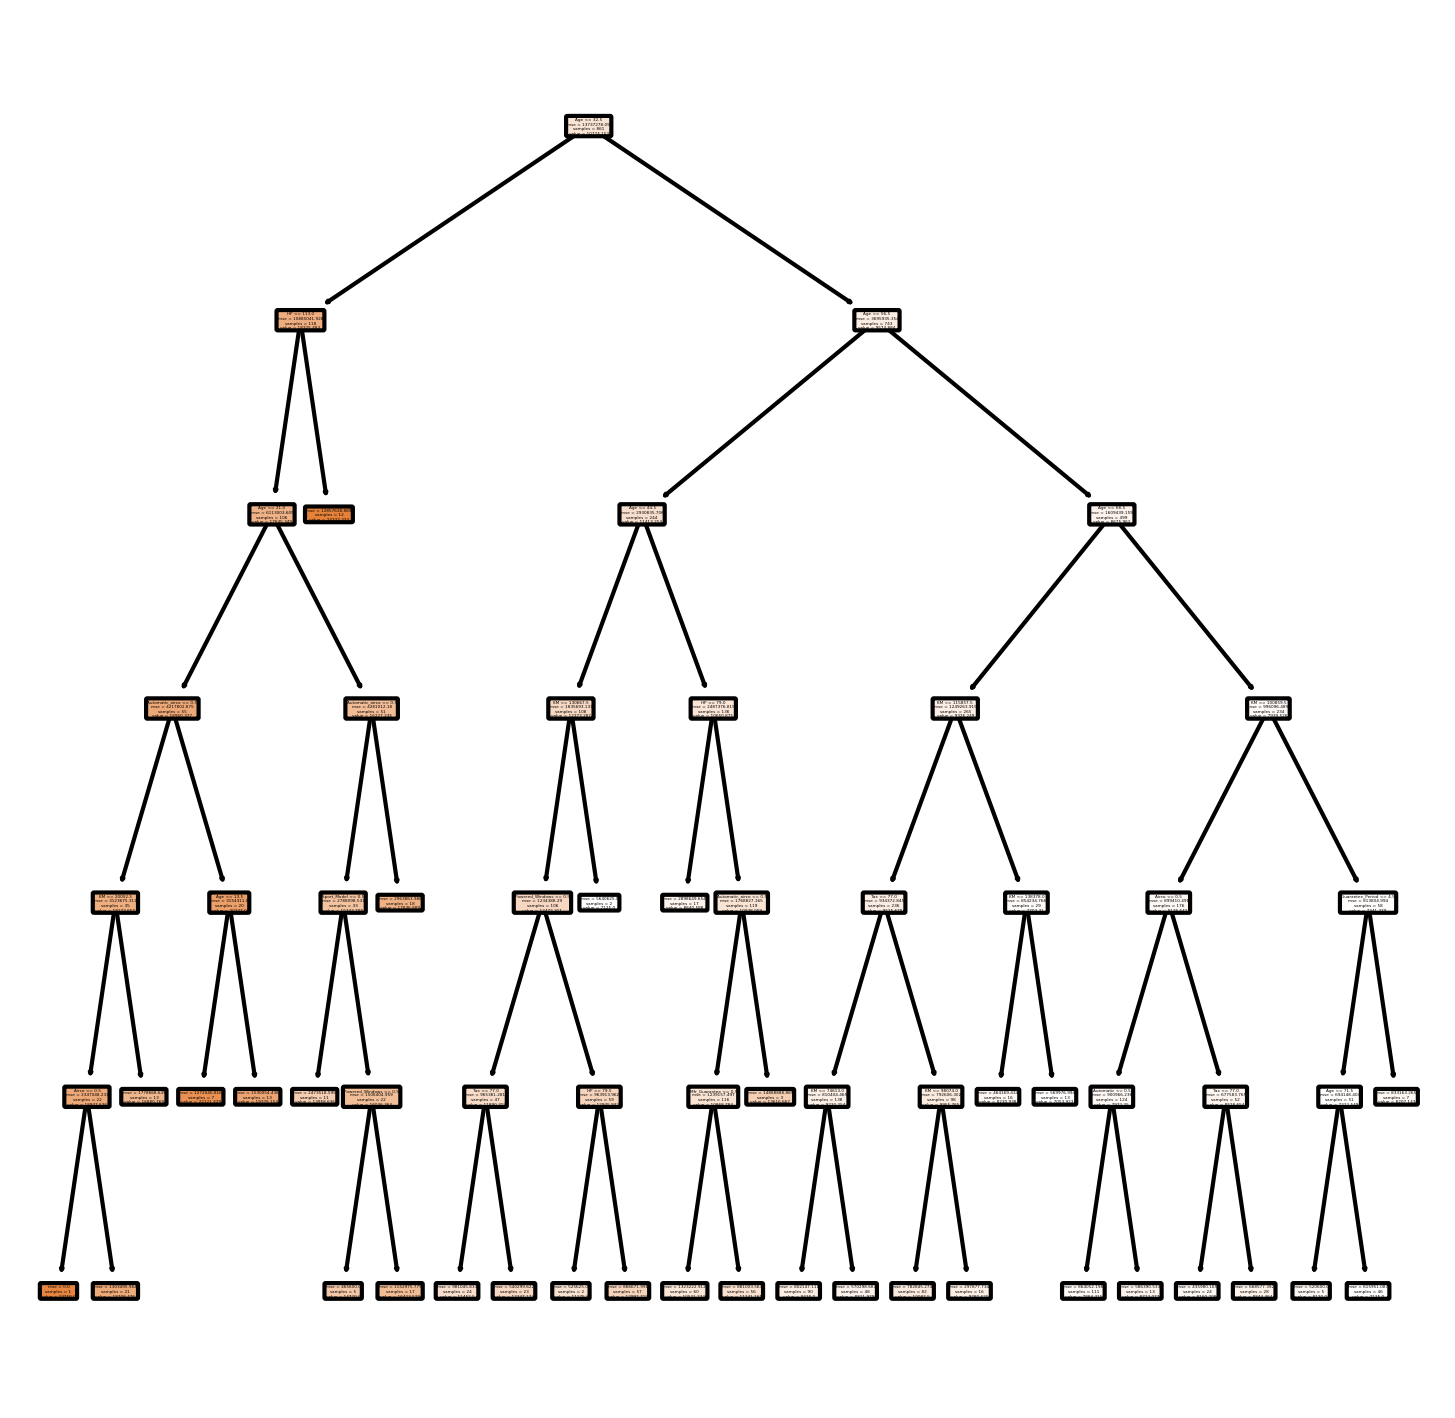

In [39]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=300)

tree.plot_tree(regTree2, 
               feature_names=train_X.columns, 
           class_names=True,
           filled = True,rounded=True);
plt.show()


In [40]:
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

dot_data = tree.export_graphviz(regTree2,
                                feature_names=train_X.columns,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('Chapter_9_Question_3A.png')

True

In [41]:
df_3a = pd.DataFrame({'Age': 77,'KM': 117000,'Fuel_Type_Petrol': '1','Fuel_Type_Diesel': 0,'HP': 110,'Automatic': 0,'Doors': 5,
                       'Tax': 100,'Mfr_Guarantee': 0,'Guarantee_Period': 3,'Airco': 1,'Automatic_airco': 0,'CD_Player': 0,
                       'Powered_Windows': 0,'Sport_Model': 0,'Tow_Bar': 1}, index=[0])
df_3a

,Age,KM,Fuel_Type_Petrol,Fuel_Type_Diesel,HP,Automatic,Doors,Tax,Mfr_Guarantee,Guarantee_Period,Airco,Automatic_airco,CD_Player,Powered_Windows,Sport_Model,Tow_Bar
0,77,117000,1,0,110,0,5,100,0,3,1,0,0,0,0,1


In [42]:
df_pred_y = regTree2.predict(df_3a)

In [43]:
df_pred_y

array([8207.14285714])

In [44]:
#PART-B:
df = pd.read_csv('ToyotaCorolla.csv')
df = df.rename(columns={'Age_08_04': 'Age', 'Quarterly_Tax': 'Tax'})
predictors = ['Age', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'Doors', 'Tax', 'Mfr_Guarantee', 'Guarantee_Period', 
              'Airco', 'Automatic_airco', 'CD_Player', 'Powered_Windows', 'Sport_Model','Tow_Bar']
outcome = 'Binned_Price'
df['Binned_Price'] = pd.cut(df.Price, 20, labels=False)

In [45]:
X = pd.get_dummies(df[predictors], drop_first=True)
y = df[outcome]

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [46]:
#Generating CT for Binned Price
param_grid = {
    'max_depth': [5, 10, 15, 20, 25], 
    'min_impurity_decrease': [0, 0.001, 0.005, 0.01], 
    'min_samples_split': [10, 20, 30, 40, 50], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Initial parameters: ', gridSearch.best_params_)

param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
    'min_impurity_decrease': [0, 0.001, 0.002, 0.003, 0.005, 0.006, 0.007, 0.008], 
    'min_samples_split': [14, 15, 16, 18, 20, ], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved parameters: ', gridSearch.best_params_)

classTree = gridSearch.best_estimator_

C:\Users\Esha Verma\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Initial parameters:  {'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_split': 20}


C:\Users\Esha Verma\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Improved parameters:  {'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_split': 16}


In [47]:
#Errors for CT (Binned Price)
regressionSummary(train_y, classTree.predict(train_X))
regressionSummary(valid_y, classTree.predict(valid_X))


Regression statistics

               Mean Error (ME) : 0.0929
Root Mean Squared Error (RMSE) : 1.0766
     Mean Absolute Error (MAE) : 0.5761

Regression statistics

               Mean Error (ME) : 0.0661
Root Mean Squared Error (RMSE) : 1.0632
     Mean Absolute Error (MAE) : 0.6643


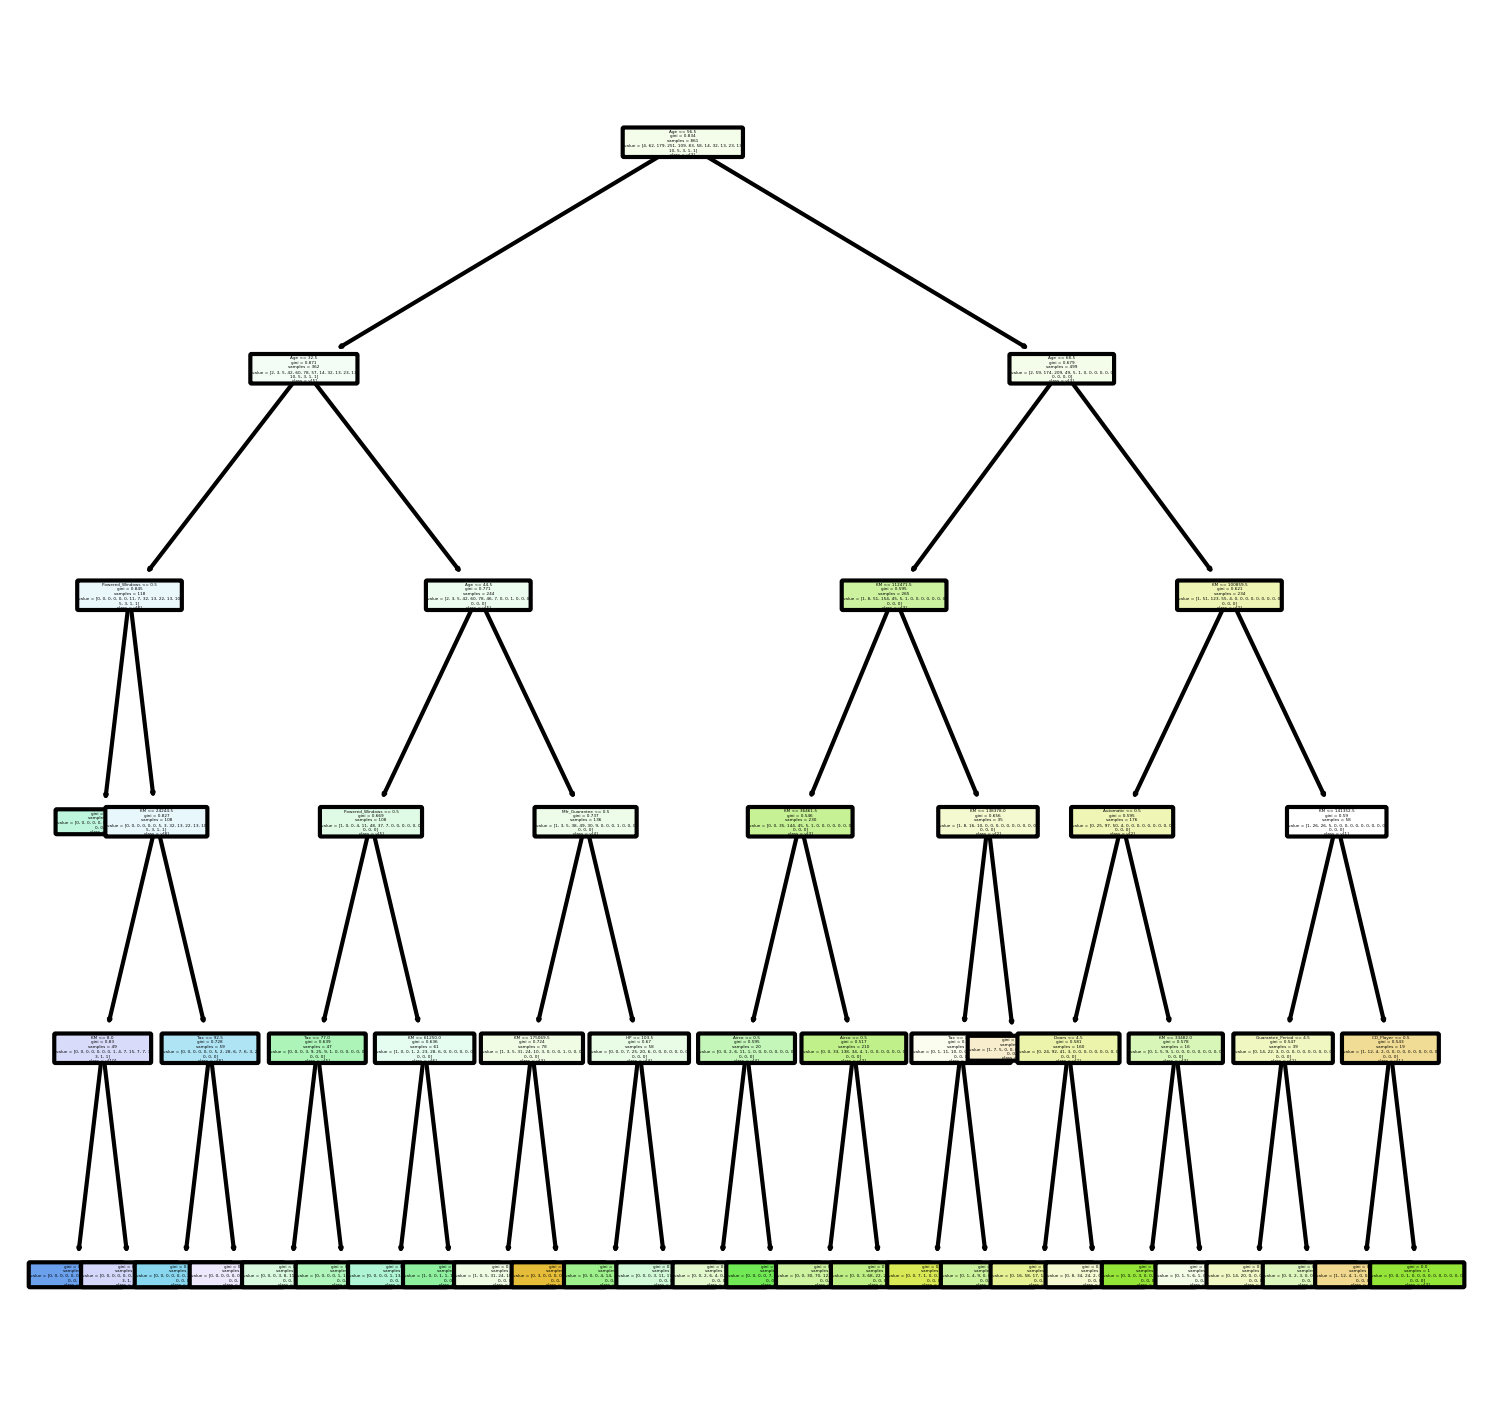

In [48]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=300)

tree.plot_tree(classTree, 
               feature_names=train_X.columns, 
           class_names=True,
           filled = True,rounded=True);
plt.show()

             feature  importance       std
14  Fuel_Type_Diesel    0.008791  0.005111
15  Fuel_Type_Petrol    0.010488  0.005631
9    Automatic_airco    0.014299  0.005379
3          Automatic    0.016426  0.005796
7   Guarantee_Period    0.025039  0.007475
10         CD_Player    0.029779  0.007359
8              Airco    0.030740  0.009032
13           Tow_Bar    0.034444  0.008489
11   Powered_Windows    0.035079  0.009117
12       Sport_Model    0.035988  0.010848
6      Mfr_Guarantee    0.037752  0.009710
4              Doors    0.048074  0.009964
2                 HP    0.053072  0.011378
5                Tax    0.053076  0.011985
1                 KM    0.259452  0.025872
0                Age    0.307501  0.031374


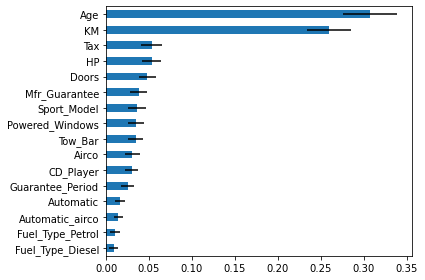

In [49]:
rf = RandomForestClassifier(n_estimators=500, random_state=1)
rf.fit(train_X, train_y)
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
df_imp = pd.DataFrame({'feature': train_X.columns, 'importance': importances, 'std': std})
df_imp = df_imp.sort_values('importance')
print(df_imp)
ax = df_imp.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [50]:
df_3b = pd.DataFrame({'Age': 77,'KM': 117000,'Fuel_Type_Petrol': '1','Fuel_Type_Diesel': 0,'HP': 110,'Automatic': 0,'Doors': 5,
                       'Tax': 100,'Mfr_Guarantee': 0,'Guarantee_Period': 3,'Airco': 1,'Automatic_airco': 0,'CD_Player': 0,
                      'Powered_Windows': 0,'Sport_Model': 0,'Tow_Bar': 1}, index=[0])
df_3b

,Age,KM,Fuel_Type_Petrol,Fuel_Type_Diesel,HP,Automatic,Doors,Tax,Mfr_Guarantee,Guarantee_Period,Airco,Automatic_airco,CD_Player,Powered_Windows,Sport_Model,Tow_Bar
0,77,117000,1,0,110,0,5,100,0,3,1,0,0,0,0,1


In [51]:
df_pred_y = classTree.predict(df_3b)

In [52]:
df_pred_y

array([3], dtype=int64)

In [29]:
df['Binned_Price'].value_counts(bins=5, sort=False)

(-0.02, 3.8]    817
(3.8, 7.6]      456
(7.6, 11.4]     134
(11.4, 15.2]     26
(15.2, 19.0]      3
Name: Binned_Price, dtype: int64